Numerical schemes for the PDE
$$\begin{cases}
    u_t + u_x = 0, & \text{for } t > 0,\; x \in (0,1); \\
    u(x,0) = \cos(6\pi x) & \text{if } x \in [0,1/3), \\
    \qquad \quad\, = 0 & \text{if } x \in [1/3,2/3), \\
    \qquad \quad\, = \cos(12\pi x) & \text{if } x \in [2/3,1]; \\
    u(0,t) = u(1,t) & \text{for } t > 0.
\end{cases}$$

In [105]:
%load_ext autoreload
%autoreload 2

%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.animation as animation
import schemes
import aux_funcs
import plotting

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

'''
PDEClass

    - Stores info about a PDE and contains methods to solve it and interpolate solutions
'''
class PDEClass:
    def __init__(self, dt, dx, tmax, initialCondition):
        self.pars = {
            'dt': dt,
            'dx': dx,
            'tmax': tmax,
            'T': int(tmax / dt),
            'J': int(1 / dx),
            'Tarray': np.linspace(0, tmax, int(tmax/dt) + 1),
            'Xarray': np.linspace(0, 1, int(1/dx) + 1),
        }

        self.initialCondition = initialCondition
        self.solutionMatrix = None

    '''
    <np 2D array> = solve(method)
    
        - Accepts: A string representation of the method (e.g., 'CIR', 'upwind', etc.)
        - Returns: A 2D array of the numerical solution
    '''
    def solve(self, method):
        self.method = method
        
        match method:
            case 'upwind':
                solutionMatrix = schemes.solveUpwind(self)
            case 'LaxFriedrichs':
                solutionMatrix = schemes.solveLaxFriedrichs(self)
            case 'CIR':
                solutionMatrix = schemes.solveCIRoptimized(self)
            case 'LaxWendroff':
                solutionMatrix = schemes.solveLaxWendroff(self)
            case 'MacCormack':
                solutionMatrix = schemes.solveMacCormack(self)
            case 'CIR-BFECC':
                solutionMatrix = schemes.solveCIRBFECCoptimized(self)
            case 'ImplicitLaxWendroff':
                solutionMatrix = schemes.solveImplicitLaxWendroff(self)

        self.solutionMatrix = solutionMatrix

        return solutionMatrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Upwind Scheme

In [90]:
# Requires CFL Condition
dt = 0.005
dx = 0.01
tmax = 10

upwindScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
upwindSchemeSol = upwindScheme.solve('upwind')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


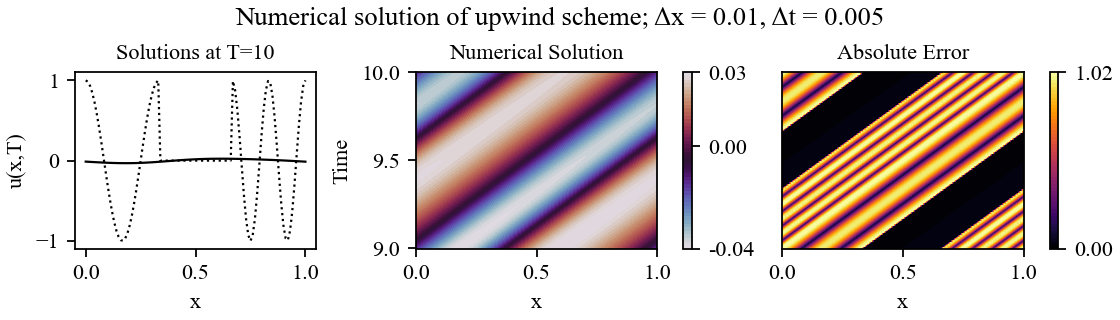

In [91]:
%load_ext autoreload
%autoreload 2

plotMinT = tmax - 1
plotMaxT = tmax

#plotting.plotNumericalSolution(upwindScheme, plotMinT, plotMaxT)
#plotting.plotTrueSolution(upwindScheme, plotMinT, plotMaxT)
#plotting.plotAbsoluteError(upwindScheme, plotMinT, plotMaxT)
plotting.plotEverything(upwindScheme, plotMinT, plotMaxT)

### CIR Scheme

In [92]:
dt = 0.005
dx = 0.01
tmax = 10

CIRscheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
CIRschemeSol = CIRscheme.solve('CIR')

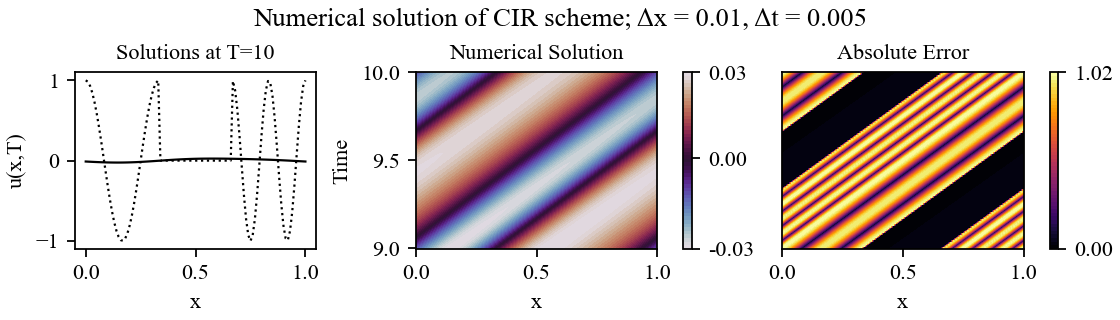

In [93]:
plotMinT = tmax - 1
plotMaxT = tmax

#plotting.plotNumericalSolution(CIRscheme, plotMinT, plotMaxT)
#plotting.plotTrueSolution(CIRscheme, plotMinT, plotMaxT)
#plotting.plotAbsoluteError(CIRscheme, plotMinT, plotMaxT)
plotting.plotEverything(CIRscheme, plotMinT, plotMaxT)

### CIR Scheme with BFECC

In [94]:
dt = 0.005
dx = 0.01
tmax = 10

CIRBFECCscheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
CIRBFECCschemeSol = CIRBFECCscheme.solve('CIR-BFECC')

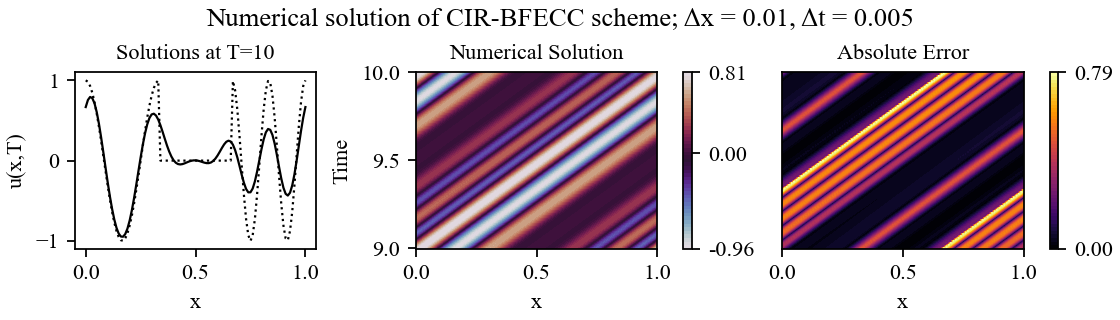

In [95]:
plotMinT = tmax - 1
plotMaxT = tmax

#plotting.plotNumericalSolution(CIRBFECCscheme, plotMinT, plotMaxT)
#plotting.plotTrueSolution(CIRBFECCscheme, plotMinT, plotMaxT)
#plotting.plotAbsoluteError(CIRBFECCscheme, plotMinT, plotMaxT)
plotting.plotEverything(CIRBFECCscheme, plotMinT, plotMaxT)

### Lax-Friedrichs Scheme

In [96]:
# Requires CFL Condition
dt = 0.005
dx = 0.01
tmax = 10

LaxFriedrichScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
LaxFriedrichSchemeSol = LaxFriedrichScheme.solve('LaxFriedrichs')

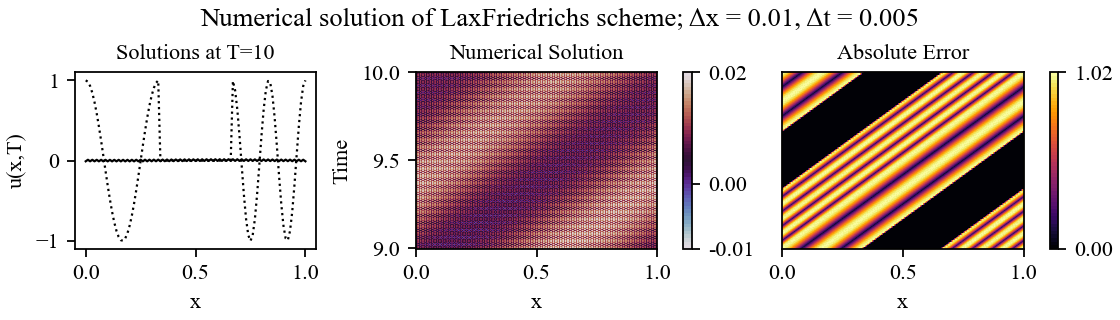

In [97]:
plotMinT = tmax - 1
plotMaxT = tmax

#plotting.plotNumericalSolution(LaxFriedrichScheme, plotMinT, plotMaxT)
#plotting.plotTrueSolution(LaxFriedrichScheme, plotMinT, plotMaxT)
#plotting.plotAbsoluteError(LaxFriedrichScheme, plotMinT, plotMaxT)
plotting.plotEverything(LaxFriedrichScheme, plotMinT, plotMaxT)

### Lax-Wendroff Scheme

In [98]:
# Requires CFL Condition
dt = 0.005
dx = 0.01
tmax = 10

LaxWendroffScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
LaxWendroffSchemeSol = LaxWendroffScheme.solve('LaxWendroff')

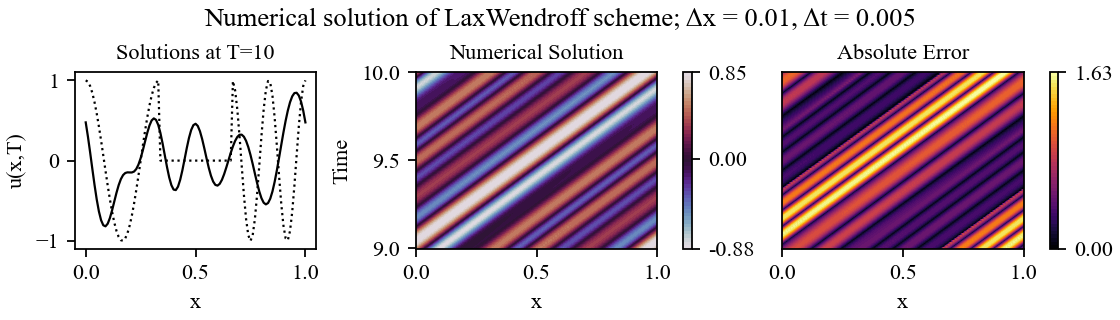

In [99]:
plotMinT = tmax - 1
plotMaxT = tmax

#plotting.plotNumericalSolution(LaxWendroffScheme, plotMinT, plotMaxT)
#plotting.plotTrueSolution(LaxWendroffScheme, plotMinT, plotMaxT)
#plotting.plotAbsoluteError(LaxWendroffScheme, plotMinT, plotMaxT)
plotting.plotEverything(LaxWendroffScheme, plotMinT, plotMaxT)

### MacCormack Scheme

In [100]:
# Requires CFL Condition
dt = 0.005
dx = 0.01
tmax = 10

MacCormackScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
MacCormackSchemeSol = MacCormackScheme.solve('MacCormack')

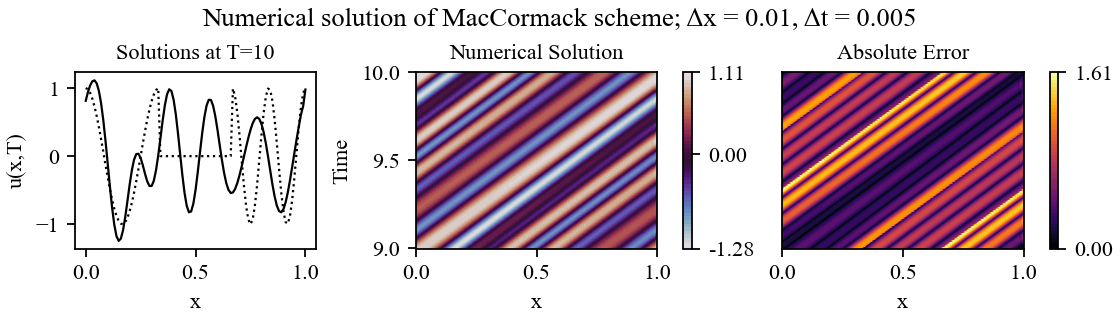

In [101]:
plotMinT = tmax - 1
plotMaxT = tmax

#plotting.plotNumericalSolution(MacCormackScheme, plotMinT, plotMaxT)
#plotting.plotTrueSolution(MacCormackScheme, plotMinT, plotMaxT)
#plotting.plotAbsoluteError(MacCormackScheme, plotMinT, plotMaxT)
plotting.plotEverything(MacCormackScheme, plotMinT, plotMaxT)

In [151]:
%load_ext autoreload
%autoreload 2

# Implicit Lax-Wendroff Scheme
dx = 0.02
dt = 0.01

myInitialCondition = lambda x: np.cos(2*np.pi*x)

ImplicitLaxWendroffScheme = PDEClass(dt, dx, tmax, myInitialCondition)
ImplicitLaxWendroffSol = ImplicitLaxWendroffScheme.solve('ImplicitLaxWendroff')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\daths\OneDrive\Documents\GT_Courses_Fall_2025\Numerical_Methods_for_PDEs\HW2\plotting.py:71: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  dxString = str(PDEobj.pars['dx'])
c:\Users\daths\miniconda3\envs\QBioS_Foundations_Env\Lib\site-packages\ipympl\backend_nbagg.py:342: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  self.figure.savefig(buf, format='png', dpi='figure')


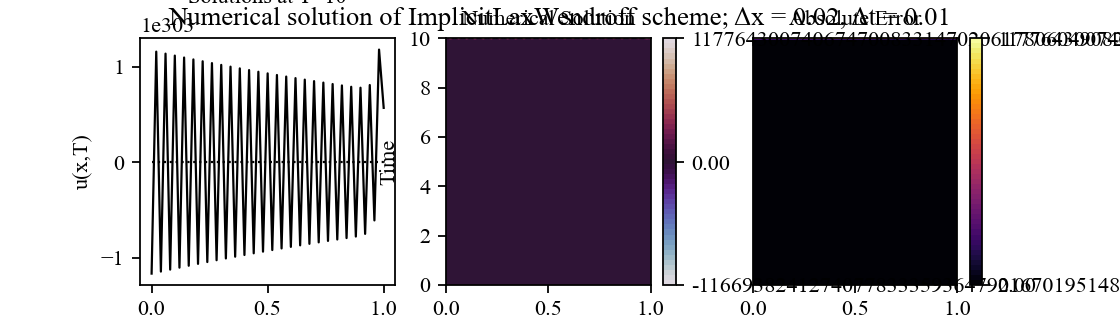

In [152]:
plotting.plotEverything(ImplicitLaxWendroffScheme, 0, 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


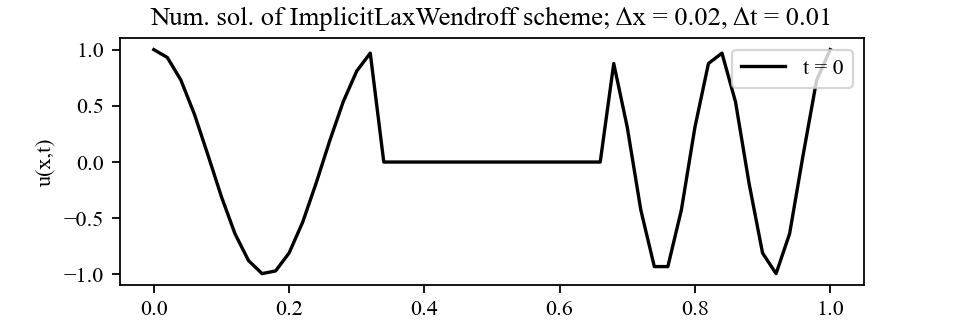

In [154]:
%load_ext autoreload
%autoreload 2

anim = plotting.animateNumericalSolution(ImplicitLaxWendroffScheme, 0, 1, save=False)